<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# HW: Machine Learning in Finance LAB

## due 2023-02-05 ##

* Yu-Ching Liao <ycliao3@illinois.edu>

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [170]:
import warnings
warnings.filterwarnings("ignore")

In [151]:
T = pd.read_csv('/Users/yu-chingliao/Library/CloudStorage/GoogleDrive-josephliao0127@gmail.com/My Drive/Note/UIUC/Spring_2023/IE517A_Machine Learning in Finance Lab/Lecture Notes/Week 02/Treasury Squeeze raw score data(1).csv')
T = T.drop(['rowindex', 'contract'], axis=1)
T.columns[:-1]

Index(['price_crossing', 'price_distortion', 'roll_start', 'roll_heart',
       'near_minus_next', 'ctd_last_first', 'ctd1_percent', 'delivery_cost',
       'delivery_ratio'],
      dtype='object')

In [152]:
X = T.drop("squeeze", axis=1).values
y = T["squeeze"].values
y = np.array(list(map(lambda x: int(x), y)))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify = y) 
print(X_train.shape, y_train.shape)

(630, 9) (630,)


# KNN Model

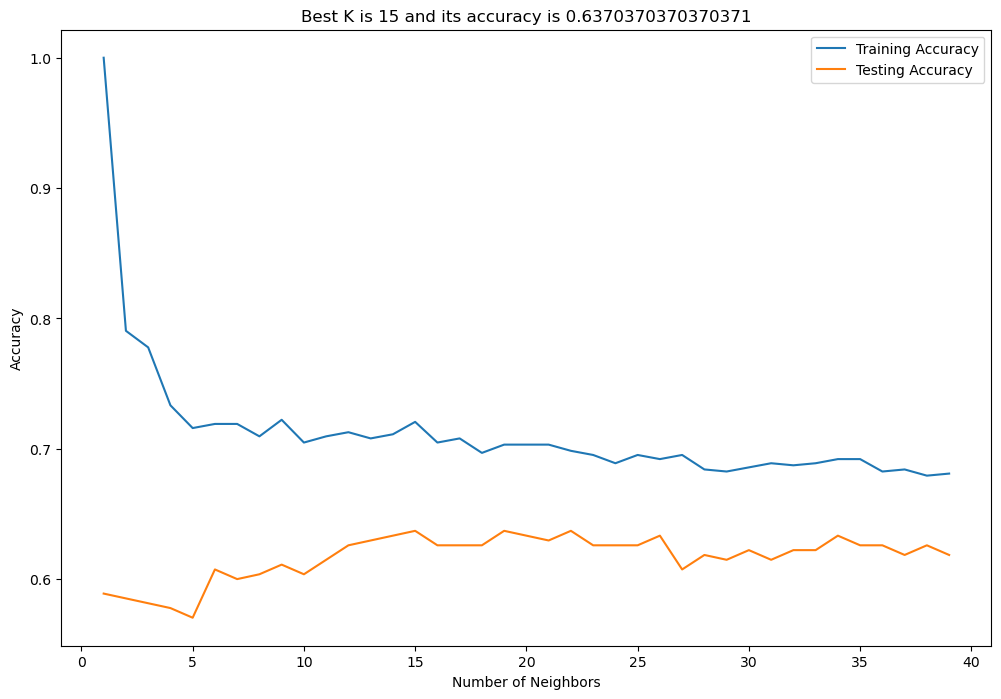

In [171]:
neighbors = np.arange(1, 40)
train_accuracies = {}
test_accuracies = {}
best_acc = 0
best_idx = 0

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    if knn.score(X_test, y_test) > best_acc:
        best_acc = knn.score(X_test, y_test)
        best_idx = neighbor
        
        
plt.figure(figsize=[12,8])

s = "Best K is "+ str(best_idx)+ ' and its accuracy is ' +str(best_acc)
# Add a title
plt.title(s)

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors , test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# Decision Tree (Gini)

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [173]:
best_acc = 0
best_index = 0
for i in range(1, 21):
    tree = DecisionTreeClassifier(criterion='gini', 
                             max_depth=i,
                             random_state=1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print("DecisionTrees's Accuracy with max_depth: ",i, ":",metrics.accuracy_score(y_test, y_pred))
    if metrics.accuracy_score(y_test, y_pred)>best_acc:
        best_acc = metrics.accuracy_score(y_test, y_pred)
        best_index = i
print("The Best max_depth is ", best_index," and its accuracy is " ,best_acc)

DecisionTrees's Accuracy with max_depth:  1 : 0.6666666666666666
DecisionTrees's Accuracy with max_depth:  2 : 0.6111111111111112
DecisionTrees's Accuracy with max_depth:  3 : 0.6444444444444445
DecisionTrees's Accuracy with max_depth:  4 : 0.5888888888888889
DecisionTrees's Accuracy with max_depth:  5 : 0.6333333333333333
DecisionTrees's Accuracy with max_depth:  6 : 0.5962962962962963
DecisionTrees's Accuracy with max_depth:  7 : 0.6111111111111112
DecisionTrees's Accuracy with max_depth:  8 : 0.5777777777777777
DecisionTrees's Accuracy with max_depth:  9 : 0.5888888888888889
DecisionTrees's Accuracy with max_depth:  10 : 0.5777777777777777
DecisionTrees's Accuracy with max_depth:  11 : 0.5888888888888889
DecisionTrees's Accuracy with max_depth:  12 : 0.5888888888888889
DecisionTrees's Accuracy with max_depth:  13 : 0.5888888888888889
DecisionTrees's Accuracy with max_depth:  14 : 0.5888888888888889
DecisionTrees's Accuracy with max_depth:  15 : 0.5888888888888889
DecisionTrees's Acc

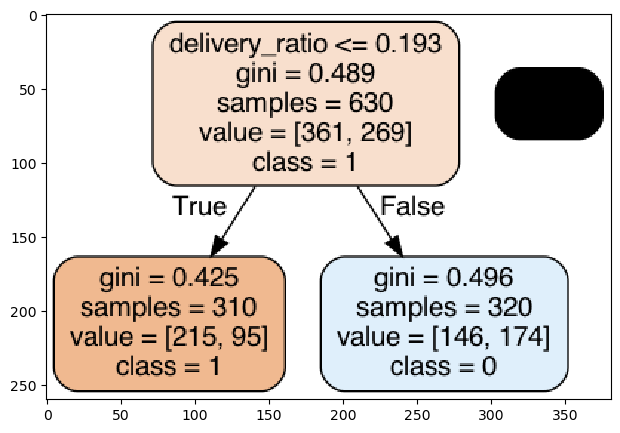

In [174]:
best_tree = DecisionTreeClassifier(criterion='gini', 
                             max_depth=best_index,
                             random_state=1)
best_tree.fit(X_train, y_train)
dot_data = export_graphviz(best_tree, 
                           filled=True,
                          rounded = True, 
                          class_names = ["1", '0'],
                          feature_names=T.columns[:-1],
                          out_file = None)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
plt.figure(figsize=(8, 5))
plt.imshow(img,interpolation='nearest')

# Decision Tree (Entropy)

In [175]:
best_acc = 0
best_index = 0
for i in range(1, 21):
    tree = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=i,
                             random_state=1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print("DecisionTrees's Accuracy with max_depth: ",i, ":",metrics.accuracy_score(y_test, y_pred))
    if metrics.accuracy_score(y_test, y_pred)>best_acc:
        best_acc = metrics.accuracy_score(y_test, y_pred)
        best_index = i
print("The Best max_depth is ", best_index," and its accuracy is " ,best_acc)

DecisionTrees's Accuracy with max_depth:  1 : 0.6666666666666666
DecisionTrees's Accuracy with max_depth:  2 : 0.6111111111111112
DecisionTrees's Accuracy with max_depth:  3 : 0.6444444444444445
DecisionTrees's Accuracy with max_depth:  4 : 0.6259259259259259
DecisionTrees's Accuracy with max_depth:  5 : 0.5962962962962963
DecisionTrees's Accuracy with max_depth:  6 : 0.6111111111111112
DecisionTrees's Accuracy with max_depth:  7 : 0.5814814814814815
DecisionTrees's Accuracy with max_depth:  8 : 0.562962962962963
DecisionTrees's Accuracy with max_depth:  9 : 0.5740740740740741
DecisionTrees's Accuracy with max_depth:  10 : 0.5888888888888889
DecisionTrees's Accuracy with max_depth:  11 : 0.562962962962963
DecisionTrees's Accuracy with max_depth:  12 : 0.5666666666666667
DecisionTrees's Accuracy with max_depth:  13 : 0.5740740740740741
DecisionTrees's Accuracy with max_depth:  14 : 0.562962962962963
DecisionTrees's Accuracy with max_depth:  15 : 0.5666666666666667
DecisionTrees's Accura

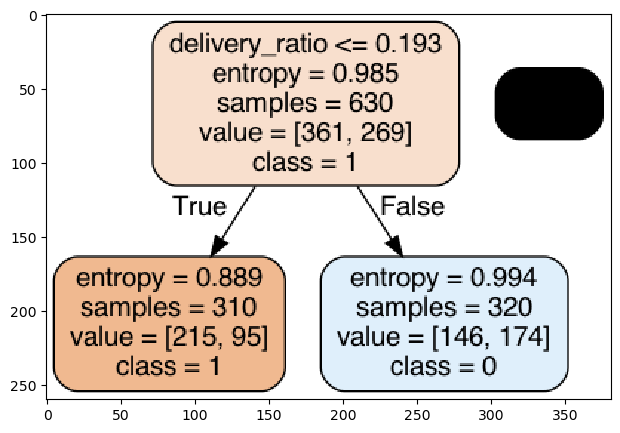

In [176]:
best_tree = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=best_index,
                             random_state=1)
best_tree.fit(X_train, y_train)
dot_data = export_graphviz(best_tree, 
                           filled=True,
                          rounded = True, 
                          class_names = ["1", '0'],
                          feature_names=T.columns[:-1],
                          out_file = None)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
plt.figure(figsize=(8, 5))
plt.imshow(img,interpolation='nearest')

# Signing

In [177]:
print("My name is Yu-Ching Liao")
print("My NetID is: 656724372")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yu-Ching Liao
My NetID is: 656724372
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
